# 2021-06-01 Testing some scenarios with `oBEvs` and `oBEao`

Results below are for commit: https://github.com/gmarkkula/COMMOTIONSFramework/commit/bbca3705f5133c5a98015500bba16e22df1c43b8

(Rerunning the code below for other commits is not guaranteed to give the same results)

I haven't really changed anything in the implementation of the model itself since the previous (2021-05-19b) diary entry, so here I will just be testing some scenarios of interest.


## Init

In [1]:
# put root folder of repo PYTHONPATH (https://stackoverflow.com/questions/714063/importing-modules-from-parent-folder)
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))
print(sys.path[-1])

# imports needed to run the simulations
import numpy as np
import commotions
import sc_scenario
from sc_scenario import get_assumptions_dict, SCSimulation
from sc_scenario_helper import CtrlType

C:\GITHUB\COMMOTIONSFramework


C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:89: UserWarning: N_ACTIONS set to no of actions in default params, so will not work if non-default params are set.
  warnings.warn('N_ACTIONS set to no of actions in default params, so will not work if non-default params are set.')


## Just the base model, no interaction

To be safe, just first confirming that the no-interaction scenario I've used before still works as it should, which it does:

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


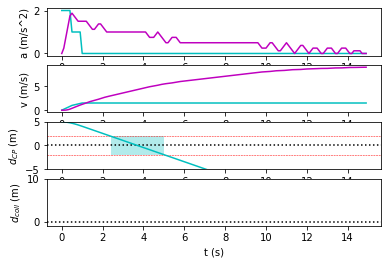

In [2]:
NAMES = ('P', 'V')
CTRL_TYPES = (CtrlType.SPEED, CtrlType.ACCELERATION) 
INITIAL_POSITIONS = np.array([[0,-5], [400, 0]])
GOALS = np.array([[0, 5], [-50, 0]])
SPEEDS = np.array((0, 0))

optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = False, oBEvs = False, oEA = False)  
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = NAMES)
sc_simulation.run()
sc_simulation.do_plots(kinem_states = True, surplus_action_vals = False)

## Baseline kinematical scenario, base model

I haven't really tested my "baseline" kinematical scenario with just the base model since adding the delay penalty for waiting. 

The kinematics-dependence is still there, and for the 40 m initial distance (what I have referred to as the baseline kinematical scenario) I get the same outcome as before (vehicle passes first), but the behaviour has changed a bit. In the same 40 m simulation in the 2021-01-16 entry, the pedestrian was a bit more aggressive, and the car responded with a quite big speed increase. What happens now looks a bit more controlled, but I'm not entirely sure I understand why - intuitively I would have guessed that the waiting cost would have made the pedestrian *more* aggressive...? Not entirely impossible that some of the other fixes I have made since 2021-01-16 can have affected this though.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m:


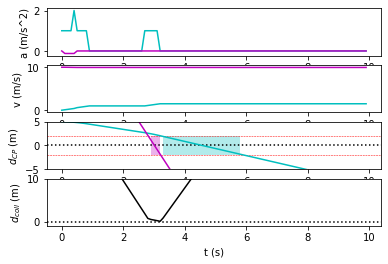

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


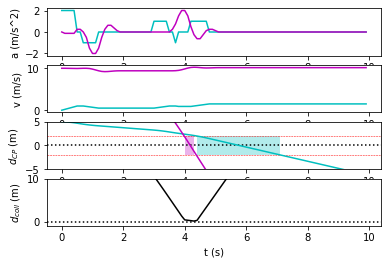

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m:


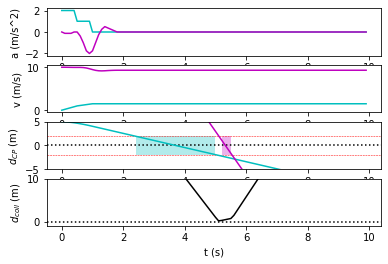

In [65]:
SPEEDS = np.array((0, 10))
PED_Y0 = -5
CONST_ACCS = (None, None)
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = False, oBEvs = False, oEA = False)
(params, params_k) = sc_scenario.get_default_params()


def run_baseline_kinematics(plot_beh_probs = False, plot_beh_activs = False,
                           plot_beh_accs = False):
    for dist0 in (30, 40, 50):
        INITIAL_POSITIONS = np.array([[0, PED_Y0], [dist0, 0]])
        sc_simulation = SCSimulation(
                CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
                end_time = 10, optional_assumptions = optional_assumptions,
                agent_names = NAMES, const_accs = CONST_ACCS, params = params)
        sc_simulation.run()
        print('Initial car distance %d m:' % dist0)
        sc_simulation.do_plots(kinem_states = True, beh_probs = plot_beh_probs,
                              beh_activs = plot_beh_activs, beh_accs = plot_beh_accs)


run_baseline_kinematics()

## Turning on `oBEvs` with baseline kinematics

Turning on `oBEvs` preserves the same outcomes across all three kinematical scenarios, but there are some minor changes in behaviour. At 40 m, the car responds more strongly to the pedestrian's initial acceleration, presumably since this (quite subtly) increases the vehicles's estimate of the probability that the pedestrian will pass in second. At 50 m the vehicle also decelerates earlier - possibly since this (even more subtly?) increases the chances that the pedestrian will pass first, thus reducing the waiting cost for the car.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m:


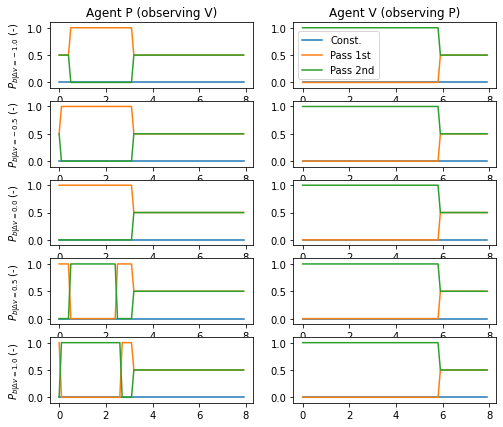

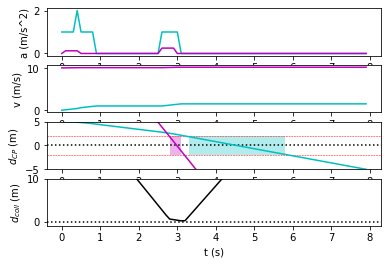

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


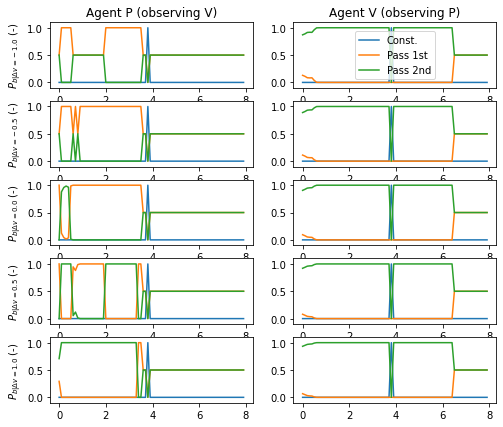

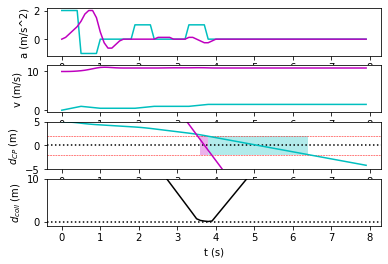

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m:


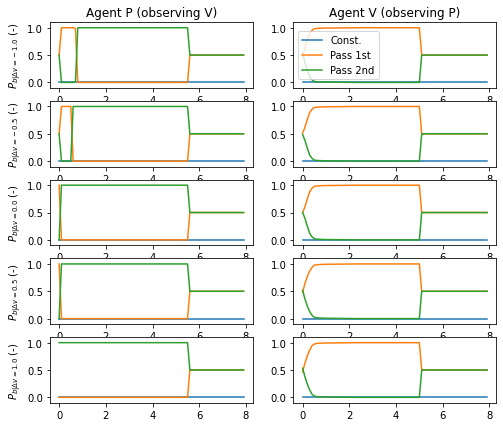

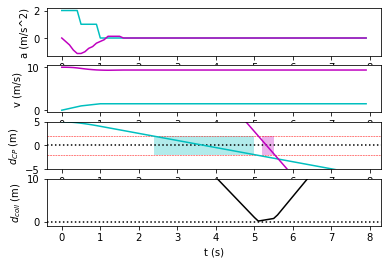

In [13]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = False, oBEvs = True, oEA = False)

run_baseline_kinematics(plot_beh_probs = True)

## Turning on `oBEao` with baseline kinematics

With `oBEao` turned on, again I get the same outcomes in the 30 and 50 m scenarios as before, but with quite a lot of uncertainty especially on the part of the car, who has a hard time feeling convinced about what the pedestrian is up to, resulting in hesitant driving behaviour. In the 40 m scenario this hesitation causes enough of a deceleration as to change the outcome to the pedestrian passing first.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m:


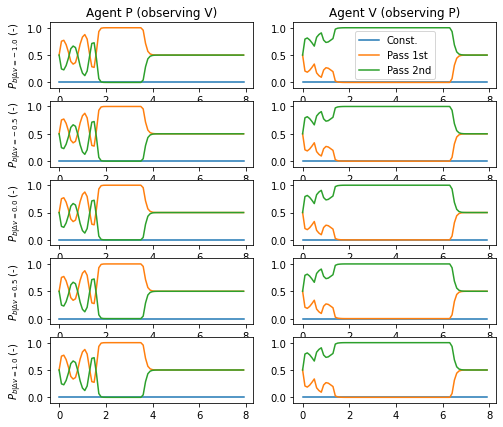

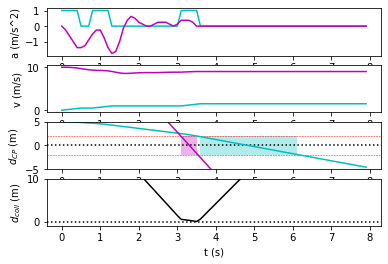

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


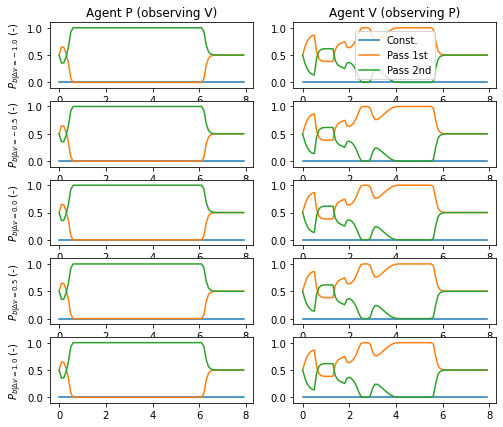

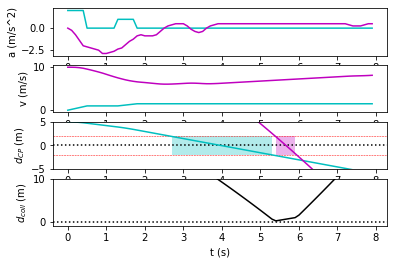

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m:


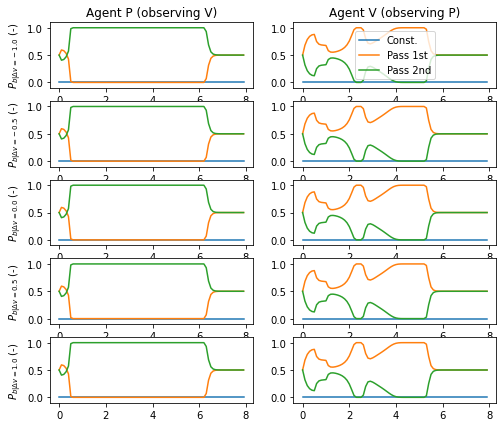

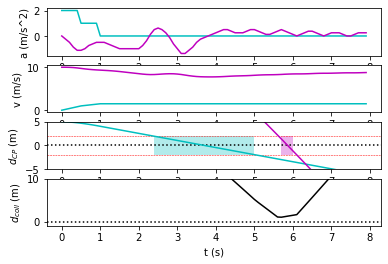

In [14]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = True, oBEvs = False, oEA = False)

run_baseline_kinematics(plot_beh_probs = True)

## Turning on both `oBEvs` and `oBEao` with baseline kinematics

Turning on both of these optional assumptions doesn't change much compared to the simulations with just `oBEvs` - but looking at the details of the behaviour probabilities there are some minor differences. It might be that the $\beta_\mathrm{O}$ parameter should be increased (currently $\beta_\mathrm{O} = \beta_\mathrm{V} = 1$) to make the action observation have a stronger effect on behaviour, but it doesn't feel like these simulations are enough to prove that. More simulations and/or actual parameter-fitting would seem needed.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m:


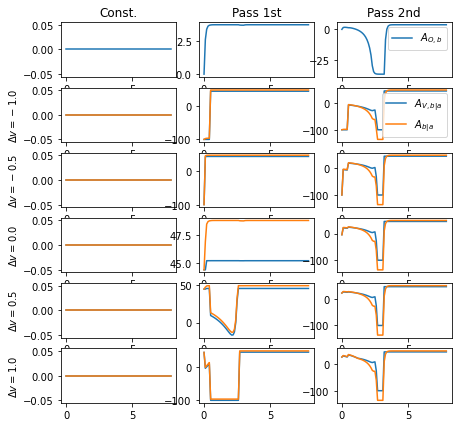

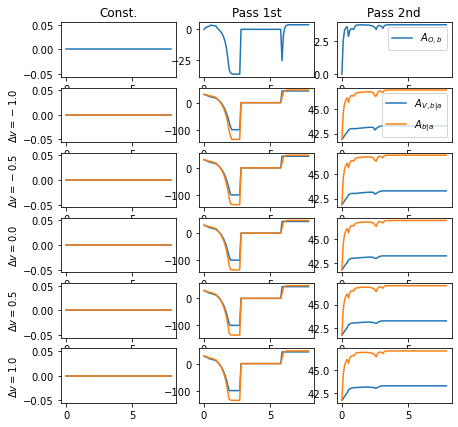

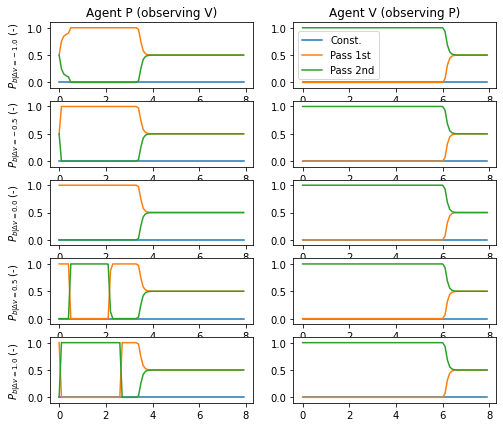

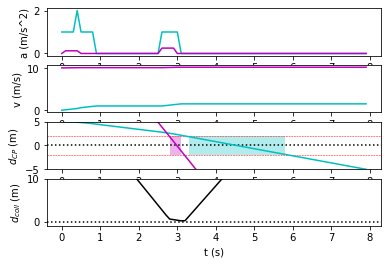

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


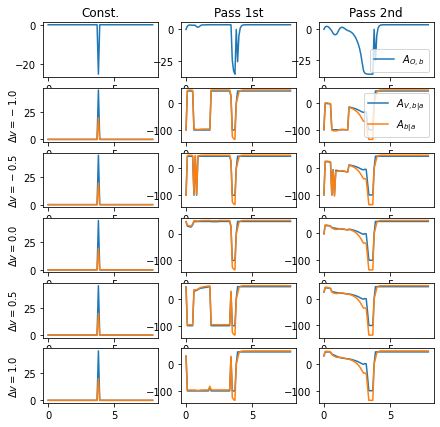

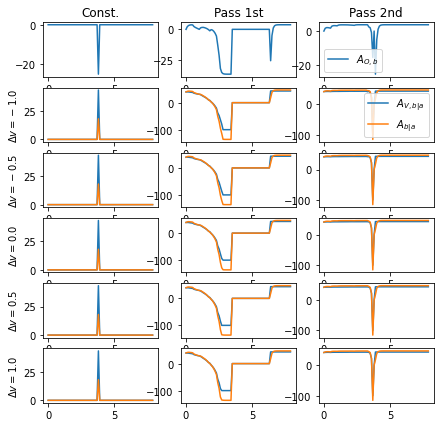

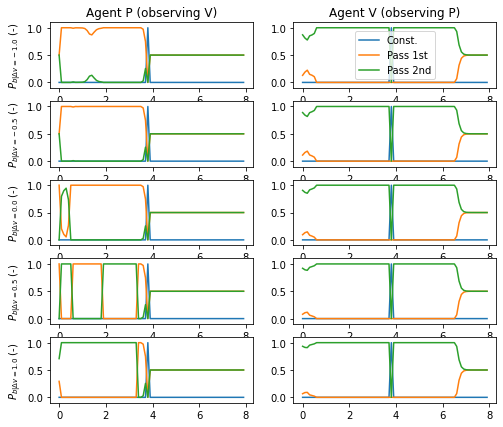

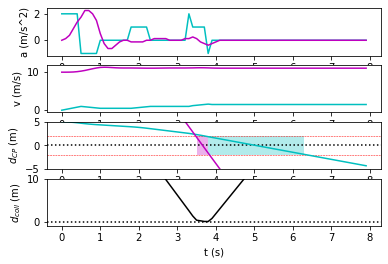

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m:


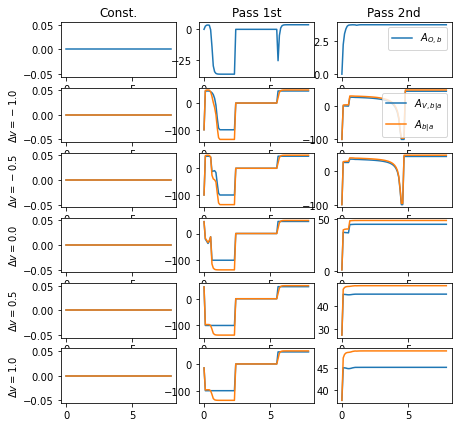

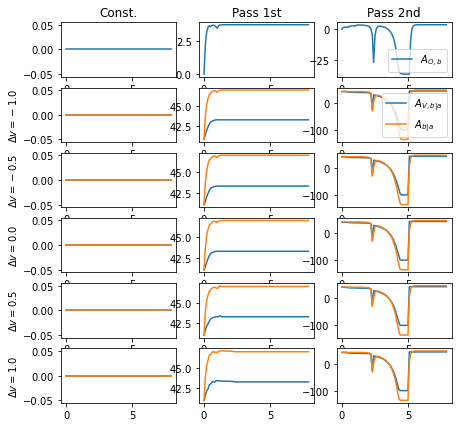

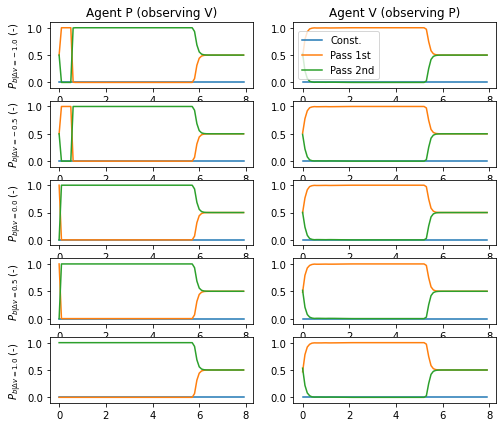

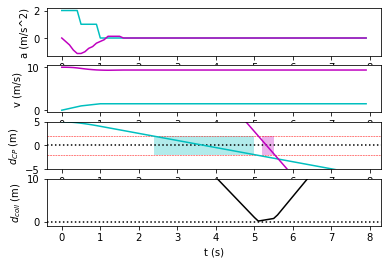

In [19]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = True, oBEvs = True, oEA = False)

run_baseline_kinematics(plot_beh_probs = True, plot_beh_activs = True)

## Testing some specific hypotheses

OK, now let's try to test some specific hypotheses in a more detailed, controlled way, by keeping the behaviour of one of the agents constant and non-interactive. The following hypotheses are sensible I think:

* The car will accelerate past a stationary pedestrian if `oBEvs` is enabled, but not if `oBEvs` is disabled. (Because the car wants to reduce the chances that the pedestrian tries to go first.)
* With lower $T_\delta$ a yielding car will decelerate more strongly to a stationary pedestrian, if `oBEvs` is enabled. (Because it is more important to the car that the pedestrian begins crossing.)
* A pedestrian will start crossing in front of a decelerating vehicle earlier with `oBEao` enabled than without it. (Because the pedestrian recognises what the car is doing. But maybe `oBEvs` is enough?)

And also one which can be tested with interactive behaviour:

* When the car wants to yield, both `oBEvs` and `oBEao` contribute to a shorter-duration interaction. (Because the car will decelerate more vigorously, and the pedestrian will understand the car's intent more quickly.)


### "The car will accelerate past a stationary pedestrian if `oBEvs` is enabled, but not if `oBEvs` is disabled."

Moving the pedestrian up a bit closer to the conflict space (the collision distance is $d_\mathrm{C}$ = 2 m) and making it stationary, otherwise rerunning the same baseline kinematical scenarios. As expected, without `oBEvs` the car just drives past at constant speed.

The small deceleration pulse just at the start is unexpected. It seems to be due to subtle effects of how the value is calculated between keeping a constant speed and changing the speed, where the ultimate outcome is expected to be essentially the same in the long run (e.g. passing first at the free speed), but if changing speed then there is a small but slow return to the free speed as part of the prediction, and for a small excursion away from the free speed that return phase can come out as having higher value than just keeping free speed all along. Possibly this could be improved by improving the accuracy of the delay discounting simplifications - the current approximation doesn't necessarily work very well for the slow return to free speed, since that return can be roughly on the same time scale as $T_\delta$, such that moving $\delta$ out of the integral (see the 2021-05-19b) is not well motivated for that term.

Since the effect is so small it doesn't seem of high priority, but it might of course have bigger impact in some other situation, so I'll put it on the todolist anyway.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m:


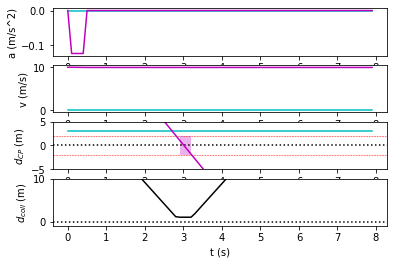

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


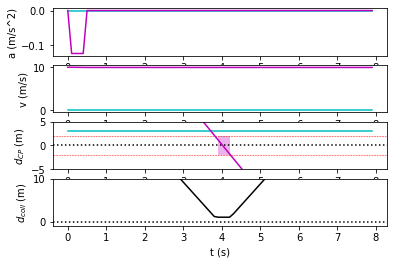

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m:


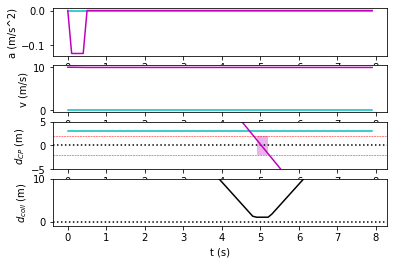

In [6]:
PED_Y0 = -3
CONST_ACCS = (0, None)
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = False, oBEvs = False, oEA = False)

run_baseline_kinematics(plot_beh_probs = False, plot_beh_activs = False)

Now enabling `oBEvs` we can see that the hypotheses we had about the vehicle speeding up holds true for the shortest, 30 m distance, seemingly since it so happens that at this distance the vehicle judges that speeding up will indeed increase the probability that the pedestrian is passing in second. For the 40 and 50 m distances, the car doesn't initially think that speeding up will make a difference - it thinks that the pedestrian will pass first regardless, so instead slows down - unclear whether this is to increase probability of the pedestrian passing first, or if it is to avoid being on a scary-looking collision course. When the pedestrian remains standing, after a while the car reconsiders and thinks the pedestrian will pass in second, and at this point there comes a similar speed increase to what we saw straight away for the 30 m case. (Basically I guess the 30 m scenario just starts things in the middle of the sequence that we see in its entirety in the longer-distance scenarioss.)

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m:


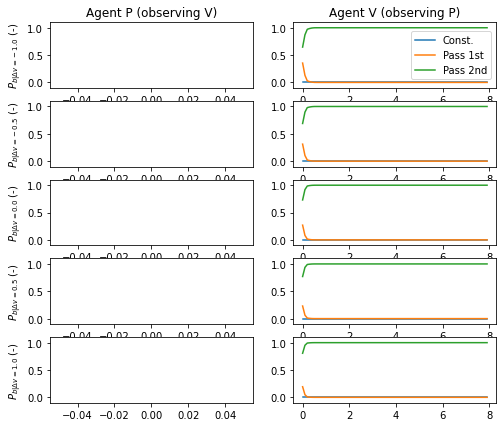

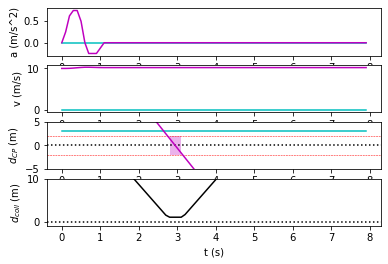

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


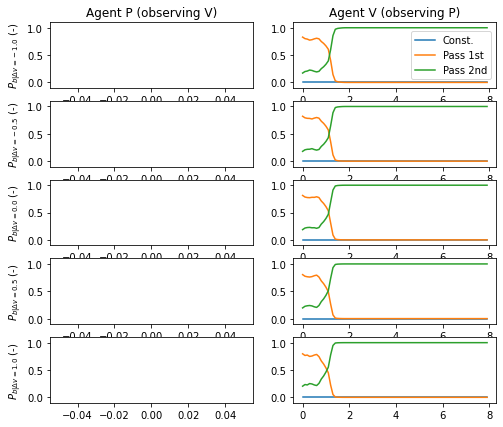

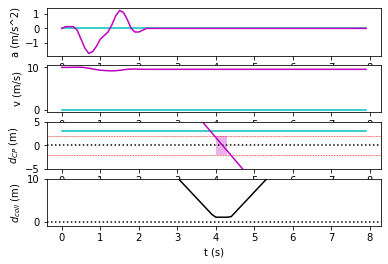

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m:


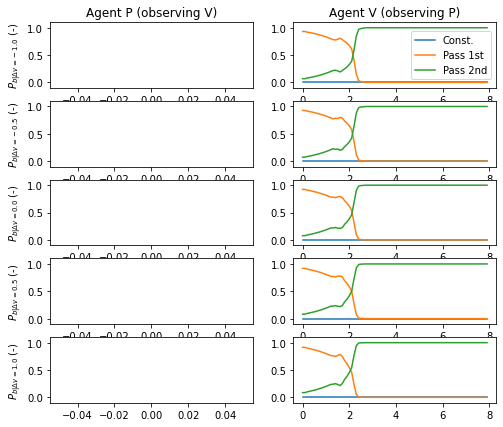

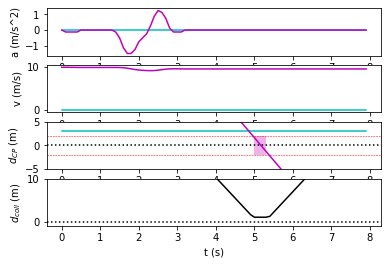

In [8]:
PED_Y0 = -3
CONST_ACCS = (0, None)
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = False, oBEvs = True, oEA = False)

run_baseline_kinematics(plot_beh_probs = True, plot_beh_activs = False)

Out of curiosity now also turning on `oBEao`. Whereas above `oBEao`+`oBEvs` was very similar to just `oBEvs`, here adding `oBEao` makes a quite big difference - by making the car decide quite quickly that the pedestrian seem to be intending to pass in second, thus allowing it to keep an essentially constant speed throughout. Possibly the car seems even a bit too sure of itself - but well well...

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m:


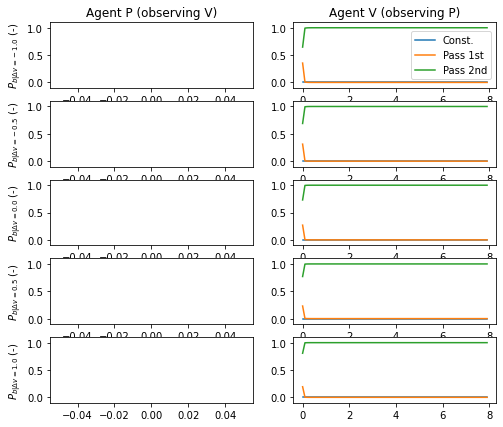

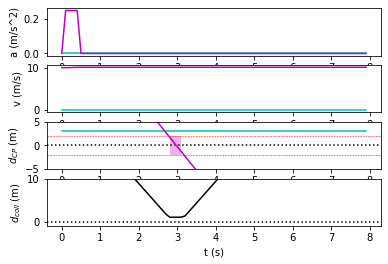

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


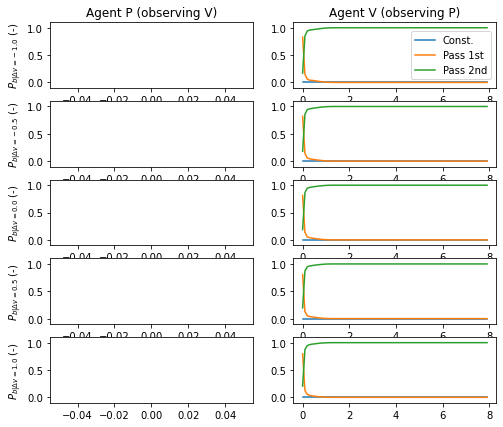

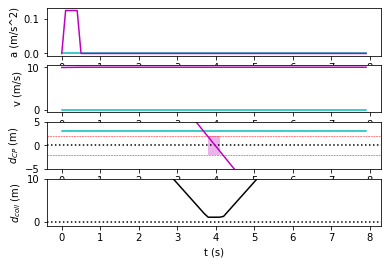

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m:


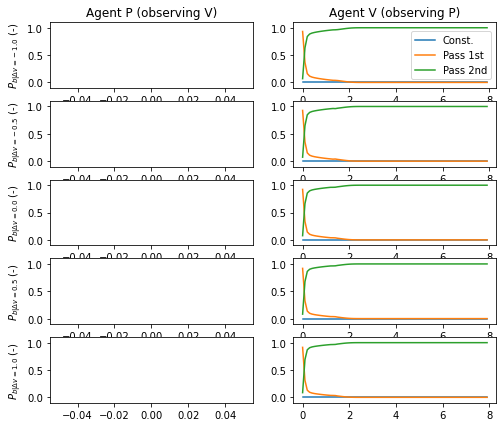

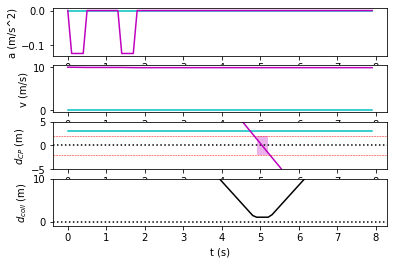

In [9]:
PED_Y0 = -3
CONST_ACCS = (0, None)
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = True, oBEvs = True, oEA = False)

run_baseline_kinematics(plot_beh_probs = True, plot_beh_activs = False)

### "With lower $T_{\delta}$ a yielding car will decelerate more strongly to a stationary pedestrian, if `oBEvs` is enabled."

First running the baseline kinematic scenarios with a stationary pedestrian and a car that wants to yield. I had to crank $V_\mathrm{ny}$ to -60 to get the car to start yielding.

Decelerations peaking at about 3, 2.5, and 2 m/s$^2$ in the three scenarios. 

Note the imperfection in the 30 m scenario as the car is coming to a full stop just at the edge of the conflict space, just barely glides into it, and then takes off.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m:


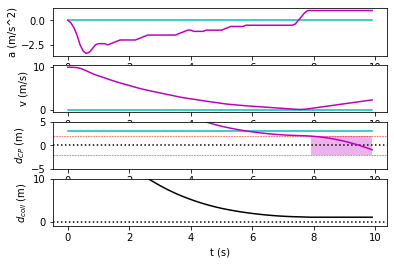

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


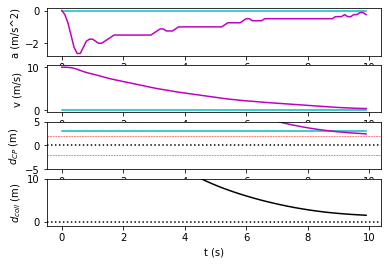

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m:


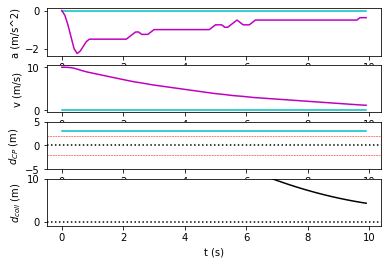

In [18]:
PED_Y0 = -3
CONST_ACCS = (0, None)
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = False, oBEvs = False, oEA = False)
params.V_ny = -60

run_baseline_kinematics(plot_beh_probs = False, plot_beh_activs = False)

Activating `oBEvs` we see a big increase in deceleration applied, instead peaking at about -5, -3, -1.8 m/s$^2$ - notably actually with a slightly lower peak in the 50 m scenario with `oBEvs` than without it. So it seems that when the car estimates the behaviour of the pedestrian, this makes the deceleration behaviour more context sensitive. At 30 m the car exaggerates the deceleration and effectively performs a short stop (nice!), reaching 1 m/s speed with about 8 m left to the conflict space (compared to with about 2 m left in the non-`oBEvs` simulation above), seemingly to increase the probability that the pedestrian will start crossing. At 40 m, already from the outset the car judges it most likely that the pedestrian will pass first, but still exaggerates deceleration slightly. At 50 m, the car estimates that it's very unlikely that the pedestrian won't pass first, and therefore sees even less of a need to slow down than in the non-`oBEvs` simulation.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m:


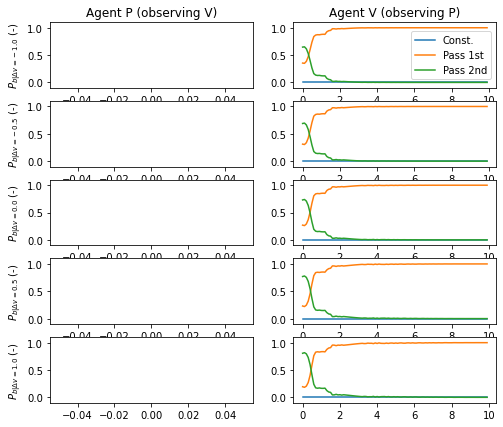

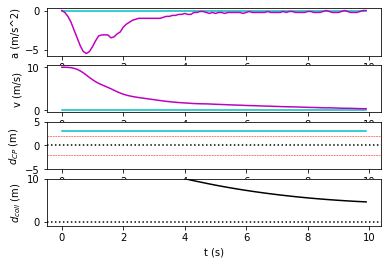

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


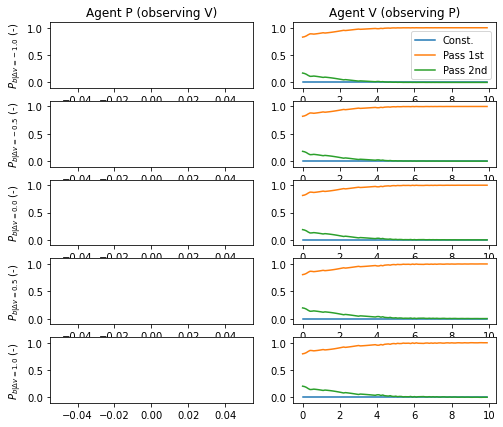

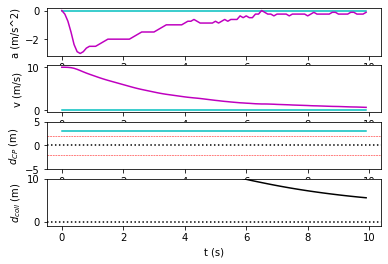

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m:


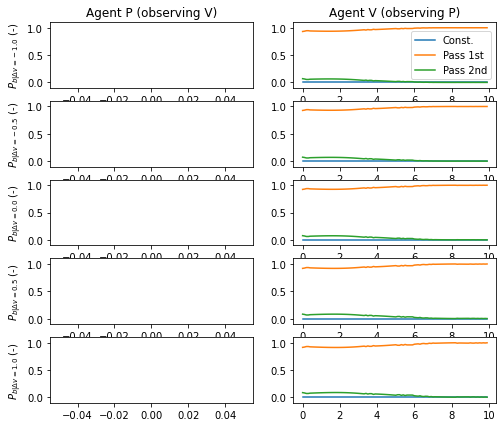

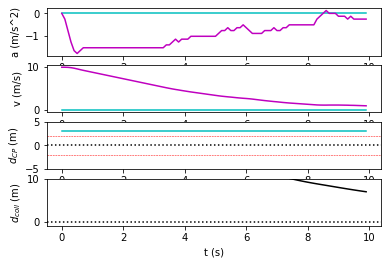

In [21]:
PED_Y0 = -3
CONST_ACCS = (0, None)
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = False, oBEvs = True, oEA = False)
params.T_delta = 30 # default value
params.V_ny = -60

run_baseline_kinematics(plot_beh_probs = True, plot_beh_activs = False)

Now reducing the $T_\delta$ as mentioned in the hypothesis. This doesn't really yield stronger deceleration, as hypothesised - those increases instead came with the activation of `oBEvs` as discussed above - but still some interesting things happen. The 30 m simulation is basically unchanged, but in both the 40 and 50 m simulations, there is a two stage deceleration. The first peak of car deceleration is lower with $T_\delta =$ 10 s than what it was for $T_\delta =$ 30 s above - I guess this is due to the change in $T_\delta$ also affecting the car's estimates of what the pedestrian will do (since the car assumes the pedestrian operates with the same $T_\delta$). In the 30 m simulation this yields a slightly less pronounced short stop. However, in the 40 m and 50 m simulations, when the initial deceleration does not result in the pedestrian beginning to cross, the car applies a second, larger pulse of deceleration.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m:


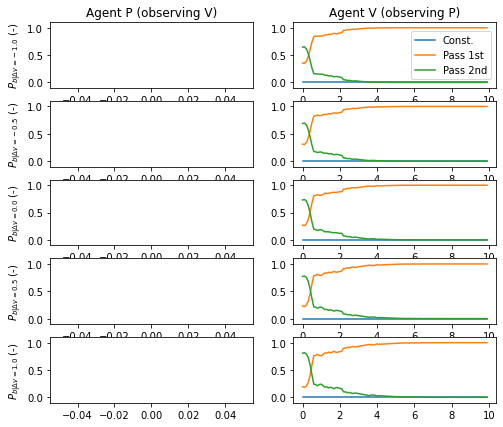

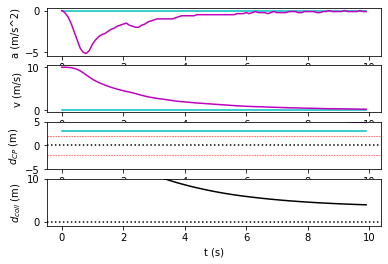

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


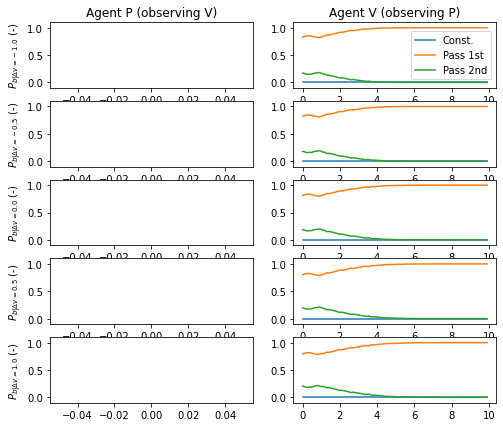

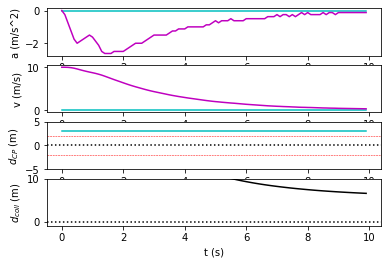

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m:


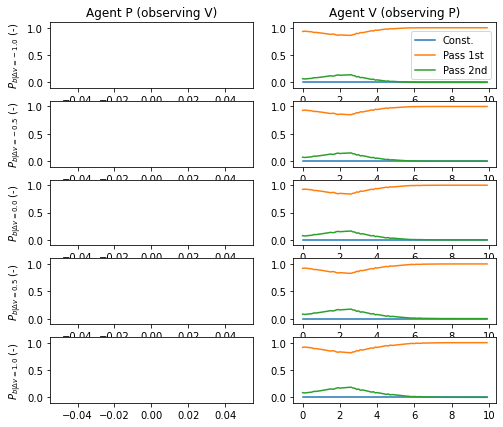

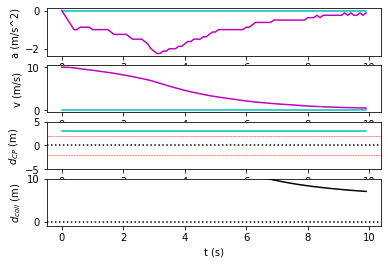

In [25]:
PED_Y0 = -3
CONST_ACCS = (0, None)
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = False, oBEvs = True, oEA = False)
params.T_delta = 10 # lower value
params.V_ny = -60

run_baseline_kinematics(plot_beh_probs = True, plot_beh_activs = False)

### "A pedestrian will start crossing in front of a decelerating vehicle earlier with `oBEao` enabled than without it."

When the car is yielding to stop just outside of the conflict space from the baseline kinematical starting conditions, the base model pedestrian begins crossing the conflict space at 6.8, 3.2, and 2.4 s, respectively.

A side note: The values shoot to very large values as the pedestrian is about to enter the conflict space. It turns out this is because being in movement inside the conflict space with a stationary other agent outside the conflict space, the current `sc_scenario_helper.get_access_order_implications()` suggests that passing in second in this situation can be achieved by an infinitely long zero acceleration, which is sort of true, but with the current approximate adding up of future value terms this looks like something very attractive, since all the normal delay discounting of future movement disappears.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m (decelerating at -1.79 m/s^2):


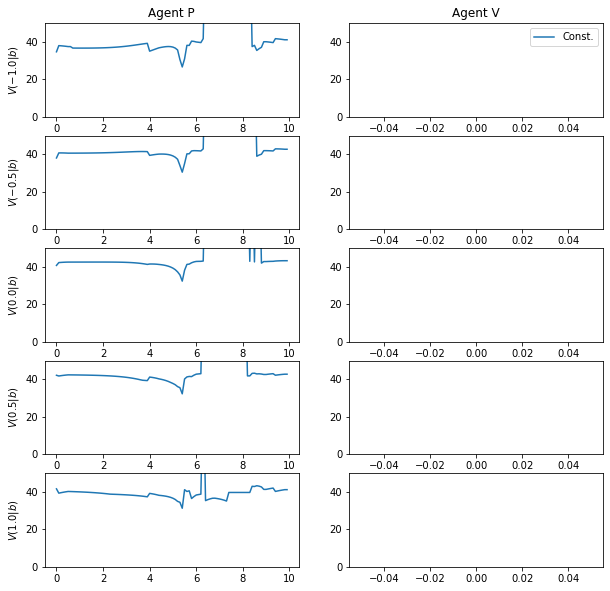

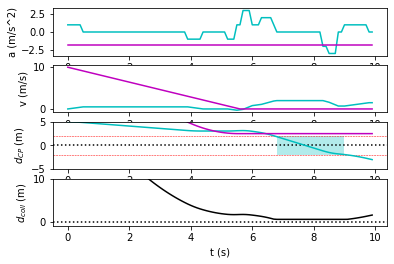

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m (decelerating at -1.32 m/s^2):


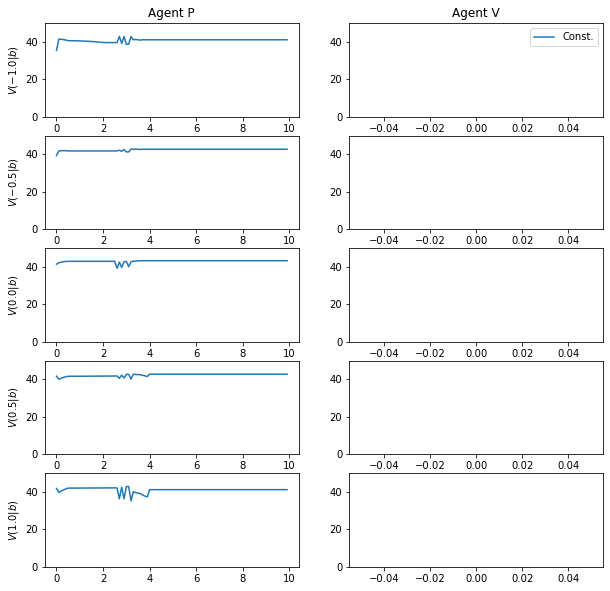

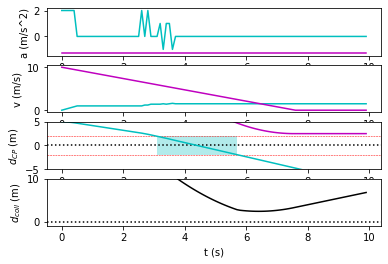

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m (decelerating at -1.04 m/s^2):


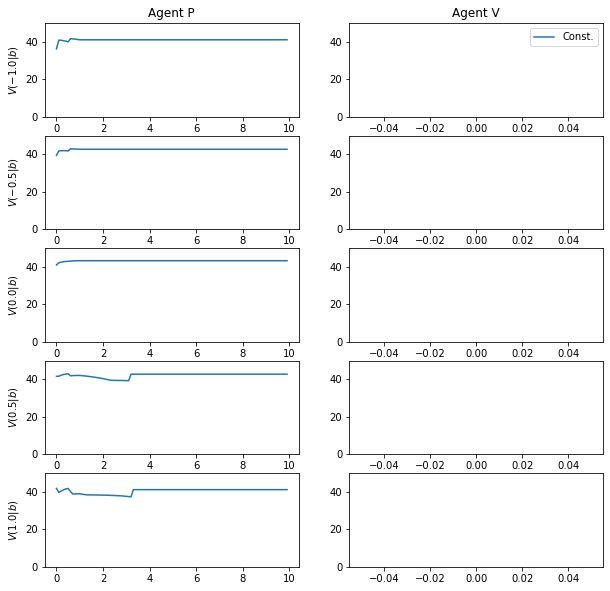

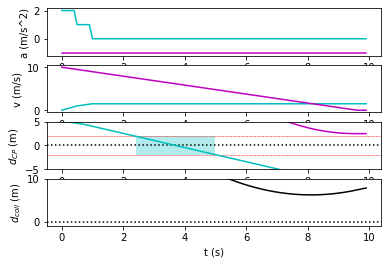

In [54]:
def run_baseline_kinematics_yielding_car(plot_beh_probs = False, plot_beh_activs = False,
                                        plot_action_vals = False):
    for dist0 in (30, 40, 50):
        stop_dist = dist0 - sc_scenario.SHARED_PARAMS.d_C
        const_accs = (None, -SPEEDS[1] ** 2 / (2 * stop_dist))
        INITIAL_POSITIONS = np.array([[0, PED_Y0], [dist0, 0]])
        sc_simulation = SCSimulation(
                CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
                end_time = 10, optional_assumptions = optional_assumptions,
                agent_names = NAMES, const_accs = const_accs, params = params)
        sc_simulation.run()
        print('Initial car distance %d m (decelerating at %.2f m/s^2):' % (dist0, const_accs[1]))
        sc_simulation.do_plots(kinem_states = True, beh_probs = plot_beh_probs,
                              beh_activs = plot_beh_activs,
                              action_vals = plot_action_vals)

PED_Y0 = -5
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = False, oBEvs = False, oEA = False)
params.T_delta = 30 # default value
params.V_ny = -60

run_baseline_kinematics_yielding_car(plot_action_vals = True)

Enabling `oBEao`, the pedestrian's behaviour changes slightly, but it still begins crossing the conflict space at what seems to be more or less exactly the same times as above (6.8, 3.2, 2.4 s).

I have looked into this in a bit more detail separately, and what is happening is that even when the car speed has reached quite low values, passing in front of the predicted future state of the car under the assumption that it is yielding is still looking quite scary to the pedestrian. Logically, passing in front of the future predicted state under the assumption of yielding will look a little less scary than passing in front of the future predicted state under a constant acceleration assumption, but the difference isn't massive. For example in the 30 m simulation, the flip happens quite abruptly at around 5.5 s; before this time the pedestrian attributes highest value to passing behind the car, regardless of whether it is yielding or not (and a higher value if it isn't yielding, since that means a shorter wait). But at ~5.5 s the car's speed is suddenly so low that passing in front of its predicted state suddenly does not look so scary. Further added into the mix here: With `oBEao` on the pedestrian behaves a little bit different in the earlier parts of the simulation, which for example in the 30 m simulation has the `oBEao` pedestrian wait a bit further away from the conflict space, such that it becomes hard to compare the exact timings of the decision to cross. 

I tried starting with the pedestrian closer to the conflict space, but that tended to make the pedestrian want to back up a little (presumably due to some of the approximations in the future value summation), which in turn made me discover that when the pedestrian moves backwards, the current `sc_scenario_helper.get_access_order_implications()` implementation returns a NaN for the second-passing acceleration for the car, which means that the pedestrian can't judge what car yielding will look like while the pedestrian itself is reversing. Another one for the todolist...

Another possible adjustment here would be to have yielding stop not precisely at the edge of the conflict space, but a bit outside it. This would increase the estimated decelerations needed yield, and consequently make crossing in front of a yielding vehicle more attractive.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m (decelerating at -1.79 m/s^2):


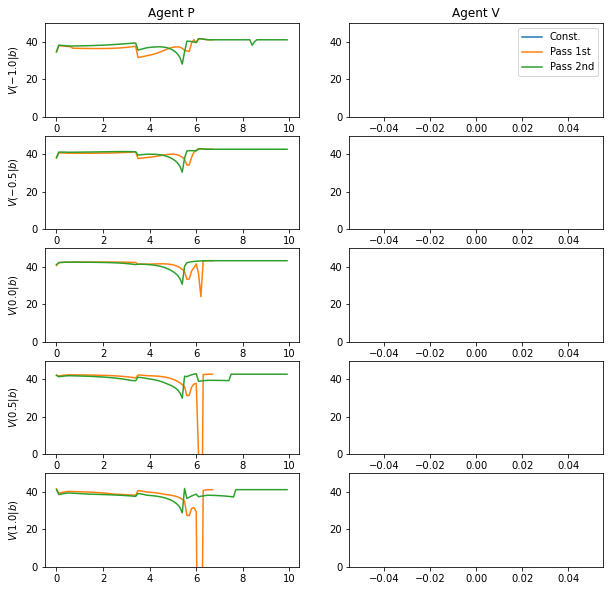

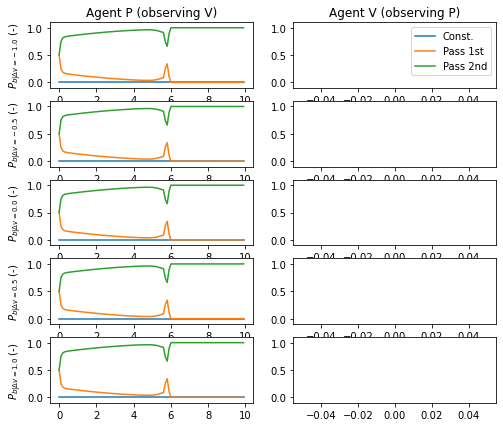

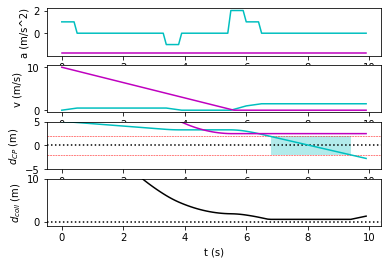

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m (decelerating at -1.32 m/s^2):


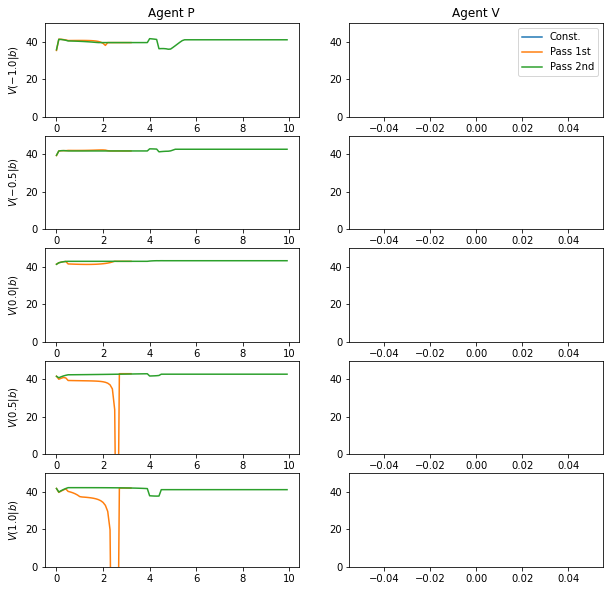

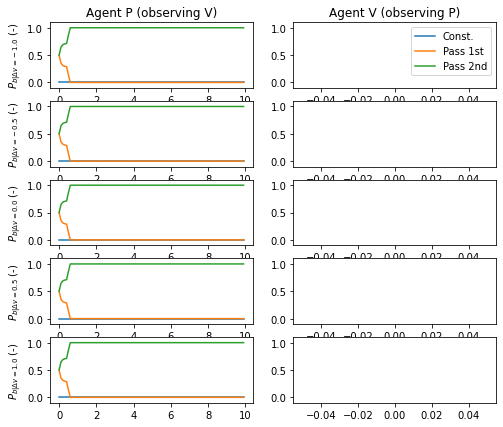

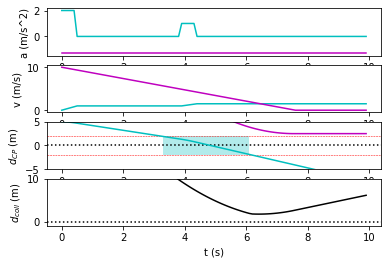

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m (decelerating at -1.04 m/s^2):


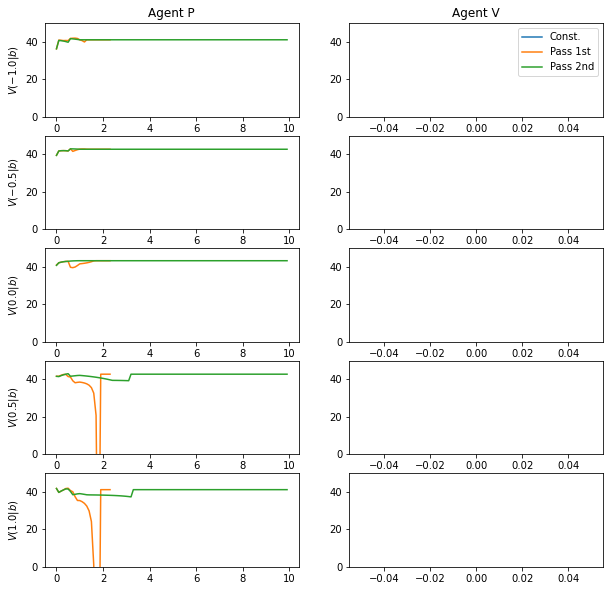

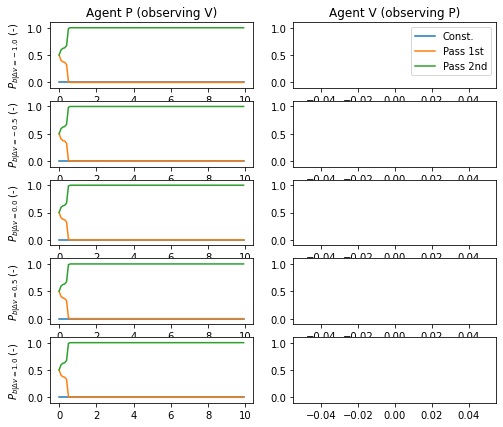

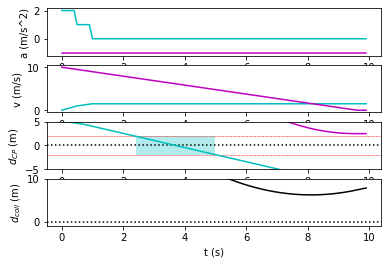

In [55]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = True, oBEvs = False, oEA = False)
params.T_delta = 30 # default value
params.V_ny = -60

run_baseline_kinematics_yielding_car(plot_beh_probs = True, plot_action_vals = True)

### "When the car wants to yield, both `oBEvs` and `oBEao` contribute to a shorter-duration interaction."

First running a simulation where the car wants to yield ($V_\mathrm{ny} =$ -60), with just the base model. In these interactions, the last agent exits the conflict space at >10 s and about 5.8 and 5.8 s, respectively.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m:


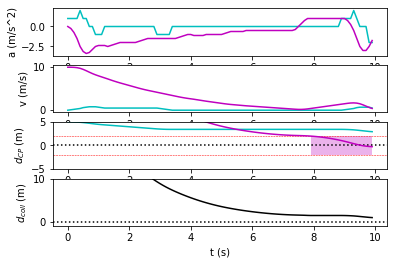

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


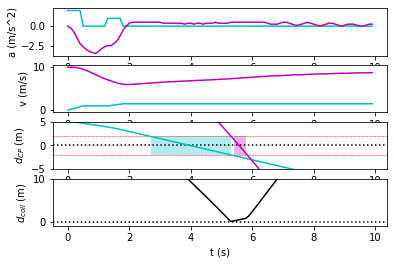

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m:


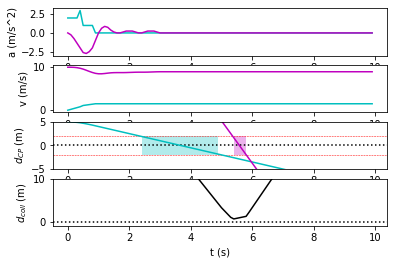

In [57]:
PED_Y0 = -5
CONST_ACCS = (None, None)
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = False, oBEvs = False, oEA = False)
params.V_ny = -60
params.T_delta = 30 # default value

run_baseline_kinematics(plot_beh_probs = False, plot_beh_activs = False)

Now enabling `oBEvs`, the interactions are more efficient, with the last agent exiting the CS after about 8, 5.5, and 5.5 s, respectively. The big change comes in the 30 m simulation, where the car applies extra deceleration just before 3 s, which makes the pedestrian believe the car is passing in second and subsequently pushes the kinematics to a place where the pedestrian is comfortable crossing. In the 40 and 50 m simulations, there isn't really much changing.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m:


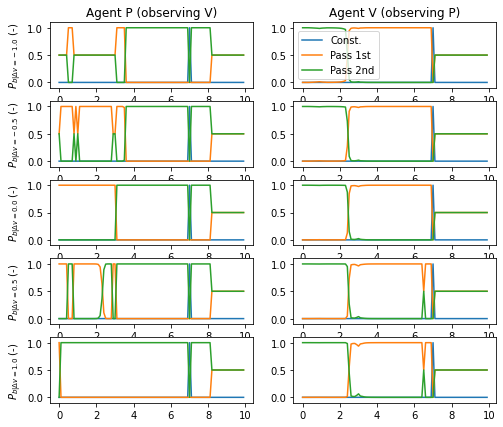

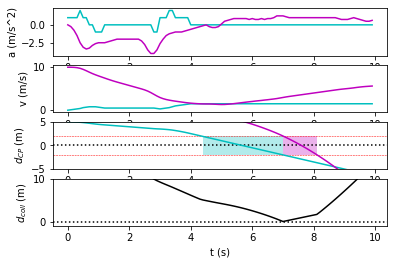

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


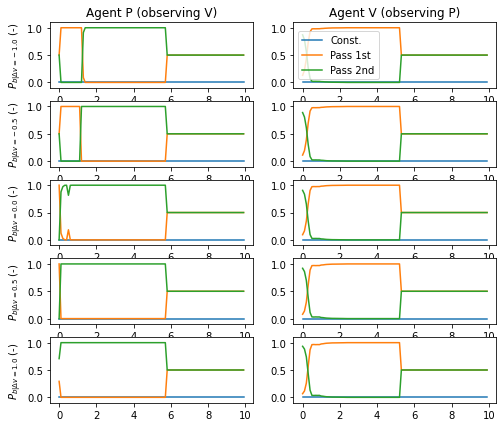

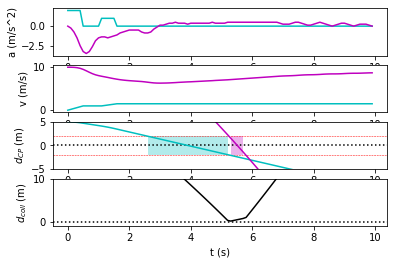

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m:


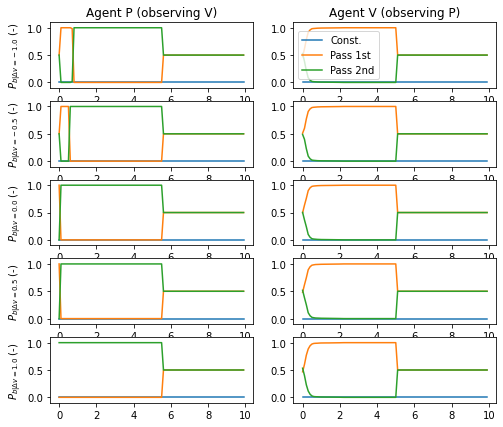

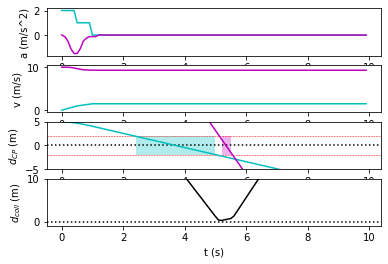

In [67]:
PED_Y0 = -5
CONST_ACCS = (None, None)
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = False, oBEvs = True, oEA = False)
params.V_ny = -60
params.T_delta = 30 # default value

run_baseline_kinematics(plot_beh_probs = True, plot_beh_activs = False, plot_beh_accs = False)

Enabling `oBEao` instead of `oBEvs` does not give so nice results. In the 30 m scenario, the pedestrian thinks throughout that it is more likely that the car will pass in second, but it is a quite tentative judgment, and notably it gets more and more tentative as time passes, rather than the other way around, which one might have expected. Meanwhile, the car thinks that the pedestrian looks like it will pass in second, and there is (quite naturally) no extra deceleration from the car to help the pedestrian know better. I think there might be a bit of thinking and/or tinkering with parameters here to make `oBEao` behave a bit more sensibly...

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m:


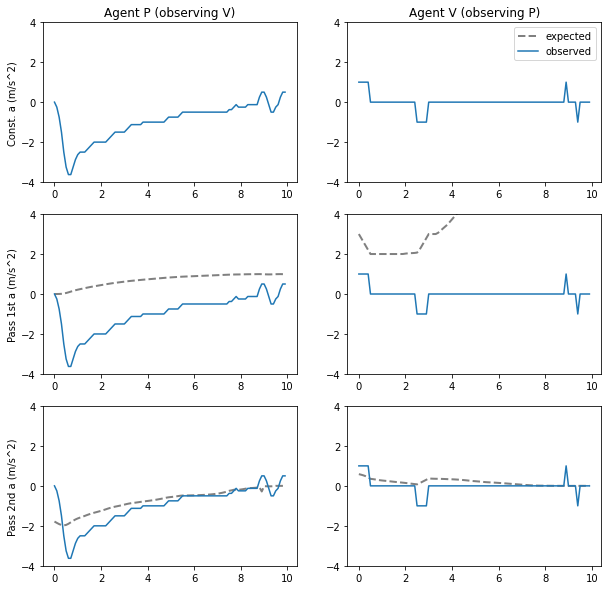

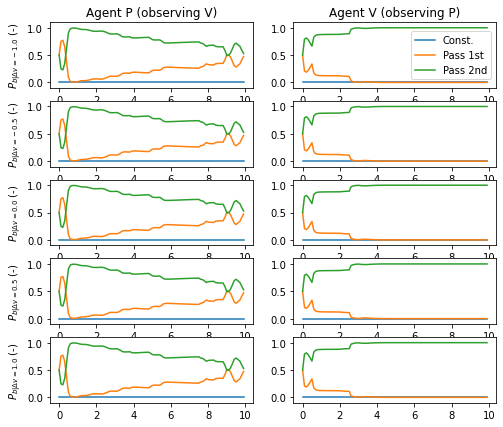

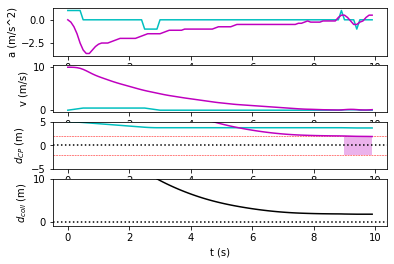

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


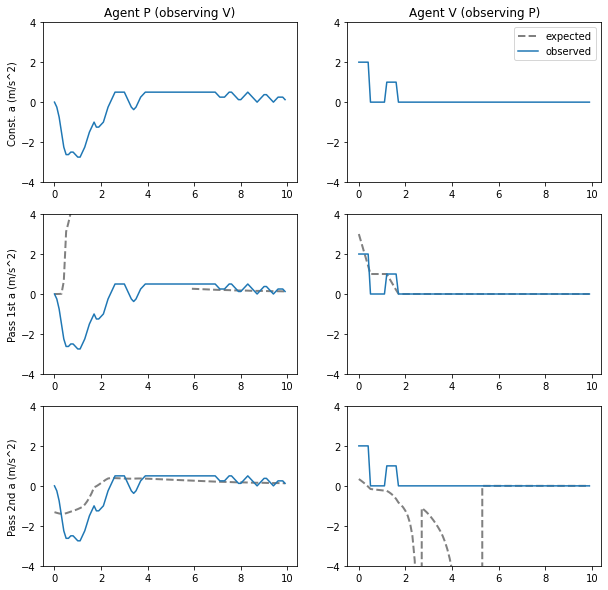

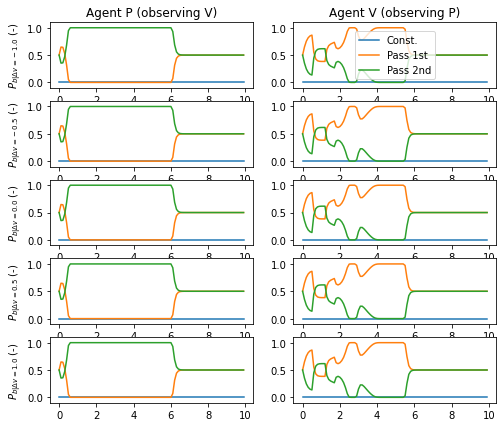

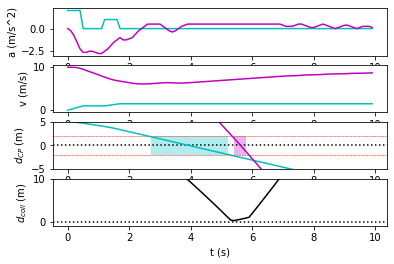

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m:


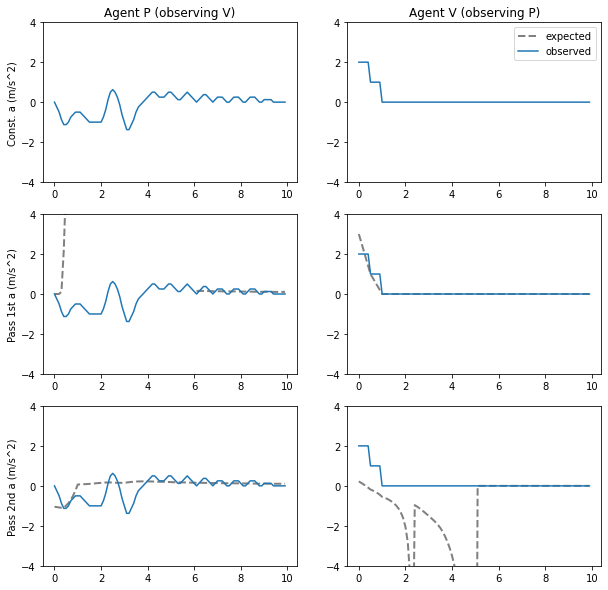

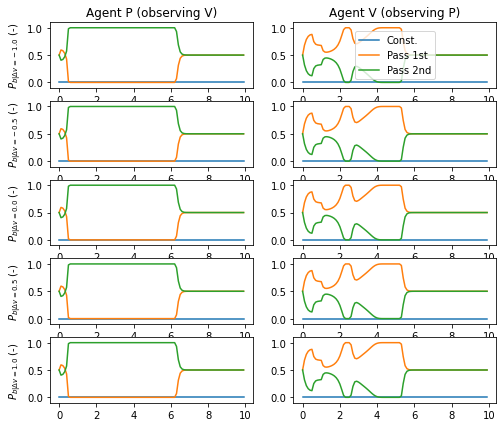

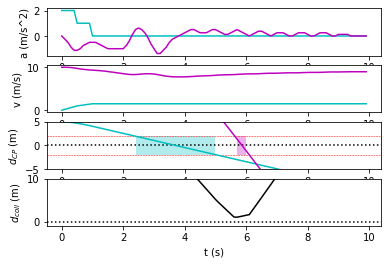

In [70]:
PED_Y0 = -5
CONST_ACCS = (None, None)
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = True, oBEvs = False, oEA = False)
params.V_ny = -60
params.T_delta = 30 # default value

run_baseline_kinematics(plot_beh_probs = True, plot_beh_activs = False, plot_beh_accs = True)

Enabling both `oBEvs` and `oBEao`, the results are now more similar to quite poor results with just `oBEao` than to the quite nice results with just `oBEvs`. I think the main culprit here, comparing the 30 m simulation below with the one for just `oBEvs` is that the car now never thinks that car deceleration can change the pedestrian's mind about passing second, such as happened at around 2.5 s in the `oBEvs`-only 30 m simulation above. In that simulation, I think that happened because the car noticed that at that point, the kinematics had begun favouring a pedestrian-first outcome, and it could help this happening with more certainty by decelerating. With also `oBEao` enabled below I think the car is now so convinced by the action observation that the pedestrian going to pass 2nd, so that the kinematics being favourable for a pedestrian-first outcome no longer is enough to push things into a place where that extra deceleration can come into play. Again - I feel I need to remind myself about how I actually implemented and parameterised `oBEao`...

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m:


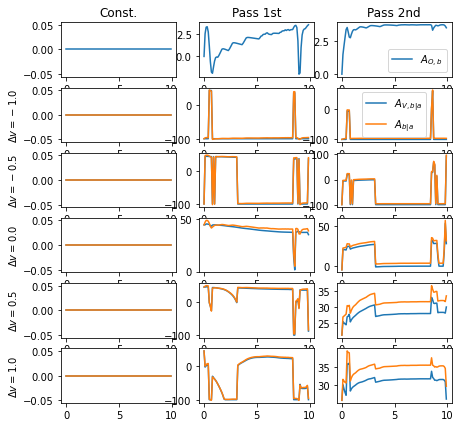

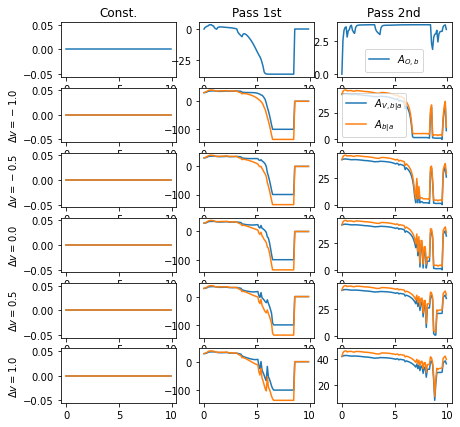

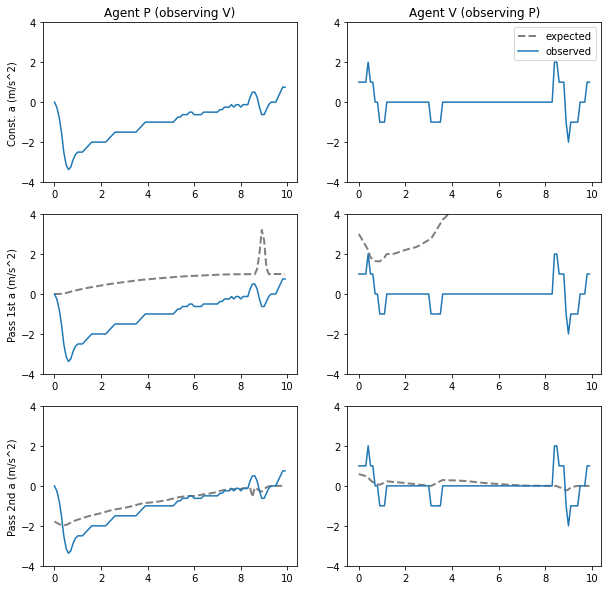

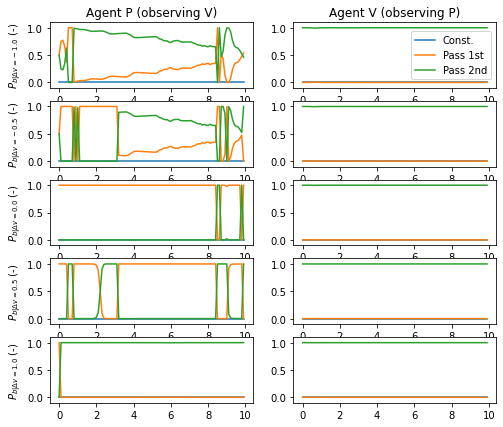

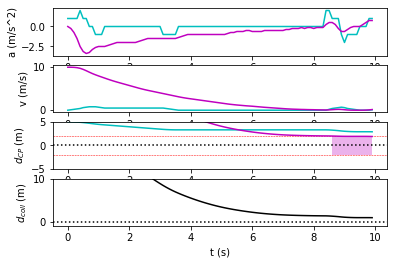

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


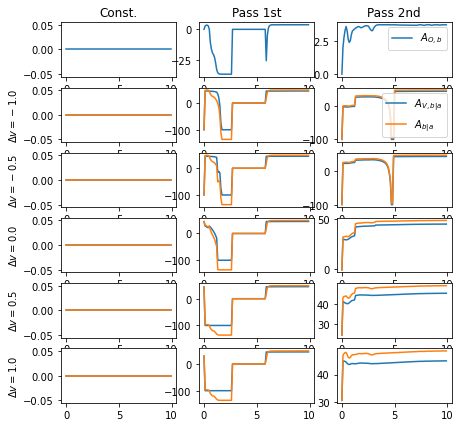

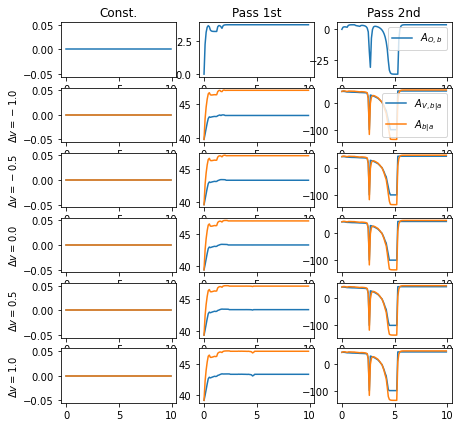

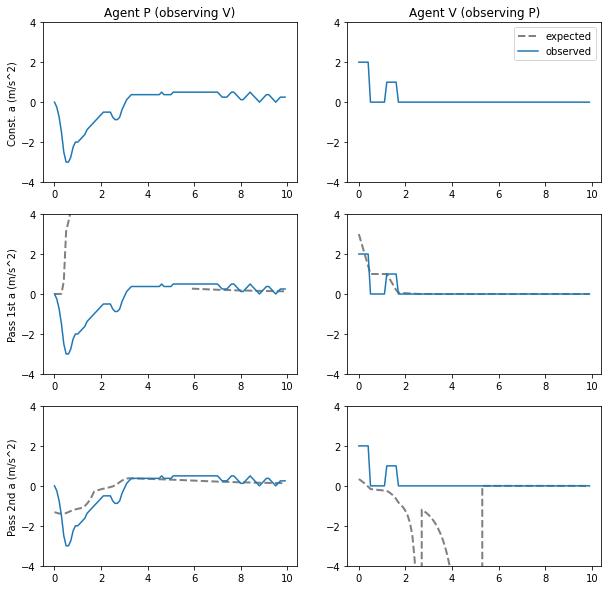

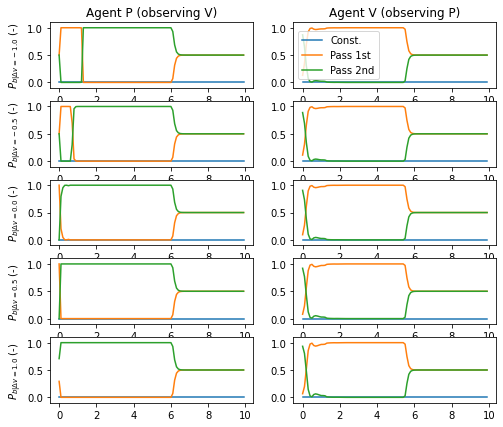

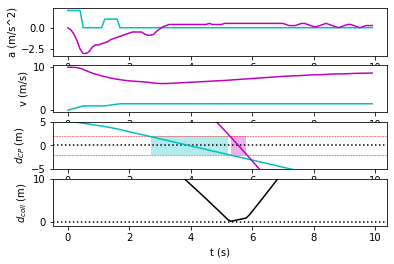

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:190: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m:


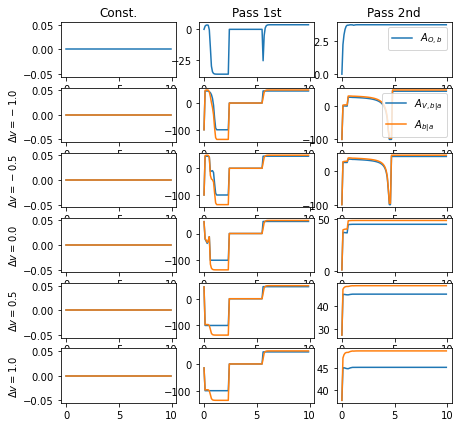

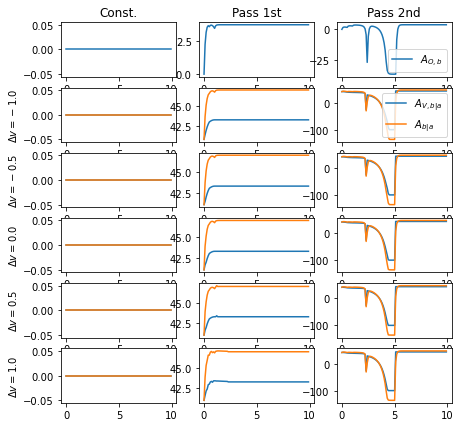

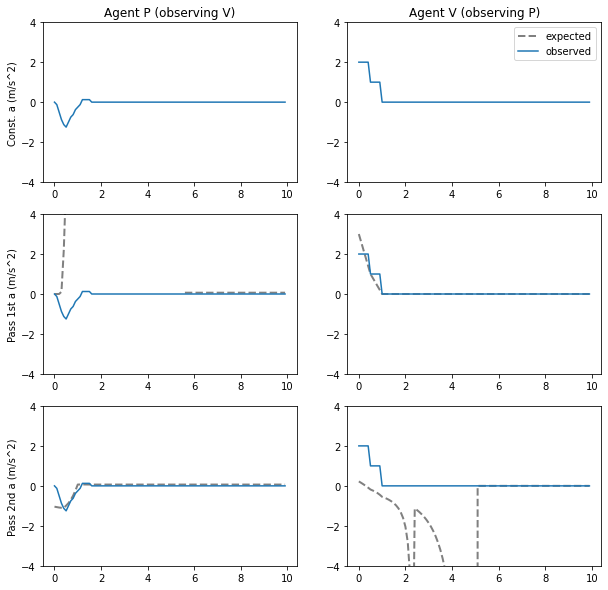

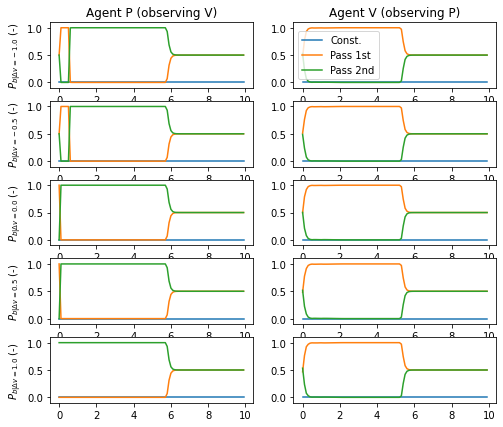

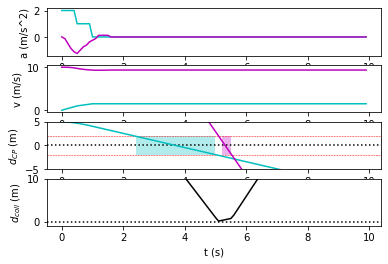

In [72]:
PED_Y0 = -5
CONST_ACCS = (None, None)
optional_assumptions = get_assumptions_dict(
        default_value = False, oBEao = True, oBEvs = True, oEA = False)
params.V_ny = -60
params.T_delta = 30 # default value

run_baseline_kinematics(plot_beh_probs = True, plot_beh_activs = True, plot_beh_accs = True)

## Summary

A lot of things seem to be working quite nice, especially concerning the `oBEvs` assumption. Some todonotes have been added regarding some special cases (with stationary or reversing agents) that are currently not handled so well in `sc_scenario_helper.get_access_order_implications()`.

**A suitable next step would seem to be to spend some time on `oBEao`, to make sure the way this assumption is implemented and parameterised is roughly appropriate.**